In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# data files
SalaryDataFile = "Salaries.csv"

# Read the data file
SalaryData = pd.read_csv(SalaryDataFile)
SalaryData.head()



,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000


In [4]:
#read in csv files
salary_df = pd.read_csv(SalaryDataFile)

#filter salary df 
filtered_salary_df = salary_df.loc[salary_df['yearID'] > 1999]
filtered_salary_df


,yearID,teamID,lgID,playerID,salary
12263,2000,ANA,AL,anderga01,3250000
12264,2000,ANA,AL,belchti01,4600000
12265,2000,ANA,AL,botteke01,4000000
12266,2000,ANA,AL,clemeed02,215000
12267,2000,ANA,AL,colanmi01,200000
...,...,...,...,...,...
25570,2015,WAS,NL,treinbl01,512800
25571,2015,WAS,NL,ugglada01,507500
25572,2015,WAS,NL,werthja01,21000000
25573,2015,WAS,NL,zimmejo02,16500000


In [5]:
#read in csv files
salary_df = pd.read_csv(SalaryDataFile)
pd.options.display.float_format = '{:,}'.format
filtered_salary_df.describe()


,yearID,salary
count,"13,312.0","13,312.0"
mean,"2,007.45703125","3,032,290.930138221"
std,4.605016502367647,"4,157,634.461273782"
min,"2,000.0","165,574.0"
25%,"2,003.0","421,975.0"
50%,"2,007.0","1,000,000.0"
75%,"2,011.0","4,000,000.0"
max,"2,015.0","33,000,000.0"


In [6]:
#sum salaries by year and team
sumOfSalaries = filtered_salary_df.groupby(by=['yearID','teamID'])['salary'].sum()
    
#create DataFrame from grouped data 
df = pd.DataFrame(sumOfSalaries, columns = ['yearID', 'teamID', 'salary'])
df


yearID teamID     salary
yearID teamID                         
2000   ANA       NaN    NaN   51464167
       ARI       NaN    NaN   81027833
       ATL       NaN    NaN   84537836
       BAL       NaN    NaN   81447435
       BOS       NaN    NaN   77940333
...              ...    ...        ...
2015   SLN       NaN    NaN  119241500
       TBA       NaN    NaN   64521233
       TEX       NaN    NaN  143742789
       TOR       NaN    NaN  112992400
       WAS       NaN    NaN  155587472

[480 rows x 3 columns]

In [15]:
# create a new dataset with the total salary
df=filtered_salary_df[['yearID','teamID','lgID','salary']].groupby(['yearID','teamID','lgID']).sum().reset_index()
df.head()


,yearID,teamID,lgID,salary
0,2000,ANA,AL,51464167
1,2000,ARI,NL,81027833
2,2000,ATL,NL,84537836
3,2000,BAL,AL,81447435
4,2000,BOS,AL,77940333


In [16]:
# create a new dataset with the total salary by team by leage 
df=filtered_salary_df[['yearID','teamID','lgID' == BAL, BOS, NYA, TOR. FLO,'salary']].groupby(['yearID','teamID','lgID']).sum().reset_index()
df.head()

NameError: name 'BAL' is not defined

In [11]:
al_east_team_dict={
    'BAL':'#FF6F1C', 
    'BOS':'#FFB627',
    'NYA':'#223843', 
    'TOR':'#1f77b4', 
    'FLO':'#FFCAD4'
}

In [12]:
# dictionaries for all leagues

al_central_team_dict={
    'CLE':'#FF6F1C', 
    'MIN':'#FFB627',
    'DET':'#223843', 
    'CHA':'#1f77b4', 
    'KCA':'#FFCAD4'
}
al_west_team_dict={
    'HOU':'#FF6F1C', 
    'OAK':'#FFB627',
    'SEA':'#223843', 
    'LAN':'#1f77b4', 
    'TEX':'#FFCAD4'
}

nl_central_team_dict={
    'ML4':'#FF6F1C', 
    'CHN':'#FFB627',
    'SLN':'#223843', 
    'PIT':'#1f77b4', 
    'CIN':'#FFCAD4'
}
nl_west_team_dict={
    'LAN':'#FF6F1C', 
    'COL':'#FFB627',
    'ARI':'#223843', 
    'SFN':'#1f77b4', 
    'SDN':'#FFCAD4'
}
nl_east_team_dict={
    'ATL':'#FF6F1C', 
    'WAS':'#FFB627',
    'PHI':'#223843', 
    'NYN':'#1f77b4', 
    'MIA':'#FFCAD4'
}

In [13]:
league_list = [al_east_team_dict, al_central_team_dict,al_west_team_dict, nl_east_team_dict, nl_central_team_dict, nl_west_team_dict]

NameError: name 'plot_team_row' is not defined

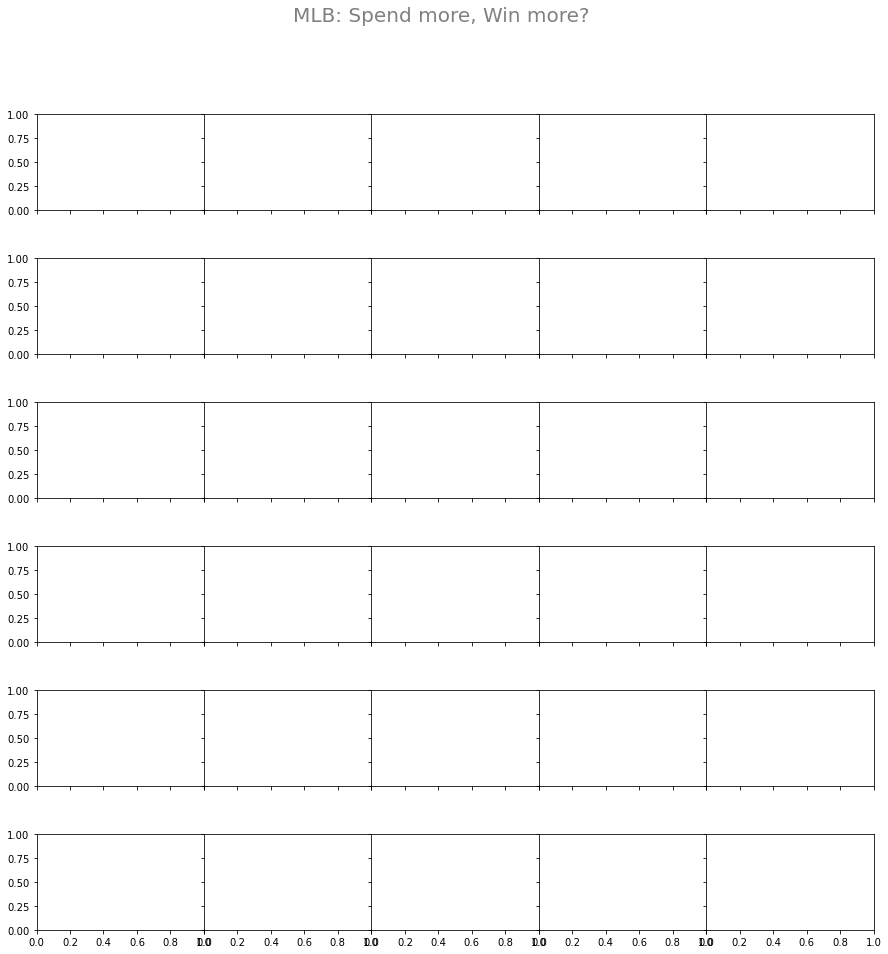

In [14]:
# create a plot that's 6 rows and 5 columns wide
fig, ax = plt.subplots(nrows=6, ncols=5,figsize=(15,15),sharex=True, sharey=True)

# set an overall title for the plot
fig.suptitle('MLB: Spend more, Win more?', ha='center',color = 'grey',fontsize=20,va='top',) 

# help the subplots fit better
fig.subplots_adjust(hspace = .5, wspace=.001)

#ax[count[pos]:  the axes object contains a numpy array for each row with 5 sub plots (count indicates the row and pos indicates the column)
count = 0 # sets the row to be filled 
for league in league_list:
    pos=0 # sets the column to be filled by a given team in the division
    for team,color in league.items():
        plot_team_row(df_merged[(df_merged['teamID']==team)], ax[count][pos],color)
        pos=pos+1
    count += 1